# Coursera Kaggle Final Project - Data Science Sales Prediction Competition

***

This challenge serves as final project for the "How to win a data science competition" Coursera course.
the link to the contest can be found here: https://www.kaggle.com/c/competitive-data-science-predict-future-sales/

In this competition, it will be worked with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

Will be predicted total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.


## About Dataset


<p><strong>sales_train.csv --></strong> The training set. Daily historical data from January 2013 to October 2015.<br>
<strong>test.csv --></strong>The test set. Data to forecast the sales for these shops and products for November 2015. The range of the target is [0-20]</p>

In [31]:
# Importing Libraries

import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import preprocessing
%matplotlib inline

Loading dataset

In [32]:
df = pd.read_csv("sales_train.csv")
test_df = pd.read_csv("test.csv")

First glimpse of the data

In [33]:
print("__________INFORMATION__________")
print(df.info())
print("__________MISSING VALUES_________")
print(df.isnull().sum())
print("__________NULL VALUES__________")
print(df.isna().sum())
print("__________SHAPE__________")
print(df.shape)
print("__________FIRST ROWS__________")
df.head(10)

__________INFORMATION__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
__________MISSING VALUES_________
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
__________NULL VALUES__________
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
__________SHAPE__________
(2935849, 6)
__________FIRST ROWS__________


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [34]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [35]:
print('# of dupes is:', len(df[df.duplicated()]))

# of dupes is: 6


## Preprocessing

Turning date column format into date_type and splitting into year, month, day 

In [36]:
df['date'] = pd.to_datetime(df['date'], format = '%d.%m.%Y')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
print(df.shape)
df.head(5)

(2935849, 9)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013


There are other complementary tables for the project, such as item categories, item names and shope names (which won't be of any help here). For the purpose of the project we will only include the item category, which can be extracted from the file items.csv

In [37]:
df_items = pd.read_csv("items.csv")
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [38]:
df = pd.merge(df, df_items, how = 'left', on = 'item_id')
print(df.shape)
df.head()

(2935849, 11)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_name,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,DEEP PURPLE The House Of Blue Light LP,58
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,DEEP PURPLE The House Of Blue Light LP,58
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [39]:
df = df.drop(columns=['item_name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                datetime64[ns]
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
day                 int64
month               int64
year                int64
item_category_id    int64
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 246.4 MB


### Downcasting DataFrame

this method is done in order to save memory

In [40]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

df = downcast_dtypes(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
date                datetime64[ns]
date_block_num      int16
shop_id             int16
item_id             int16
item_price          float32
item_cnt_day        float32
day                 int16
month               int16
year                int16
item_category_id    int16
dtypes: datetime64[ns](1), float32(2), int16(7)
memory usage: 106.4 MB
None


## EDA - Viz

First we are going to explore the different scatter plots for the main features 

<function matplotlib.pyplot.show(*args, **kw)>

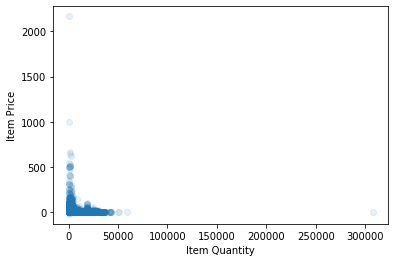

In [41]:
plt.scatter(df["item_price"],df["item_cnt_day"], alpha=0.1)
plt.xlabel("Item Quantity")
plt.ylabel("Item Price")
#plt.xscale('log')
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x29c15194108>,
 'caps': [<matplotlib.lines.Line2D at 0x29c15183048>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c15183fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x29c15ccfec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c15ccfc08>],
 'means': []}

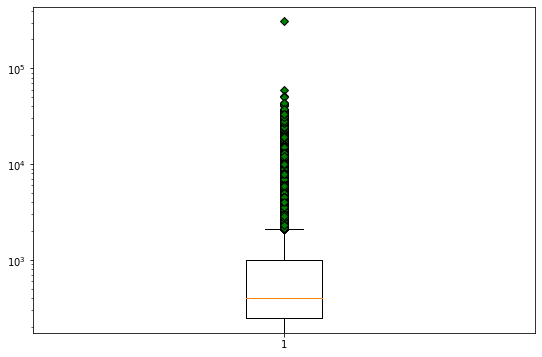

In [46]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1 = plt.figure(1, figsize=(9, 6))
ax1 = fig1.add_subplot(111)
ax1.set_yscale("log")
ax1.boxplot(df.item_price, flierprops=green_diamond)


{'whiskers': [<matplotlib.lines.Line2D at 0x29c159e4848>,
 'caps': [<matplotlib.lines.Line2D at 0x29c159dc088>,
 'boxes': [<matplotlib.lines.Line2D at 0x29c159e0d48>],
 'medians': [<matplotlib.lines.Line2D at 0x29c159d73c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x29c159d7348>],
 'means': []}

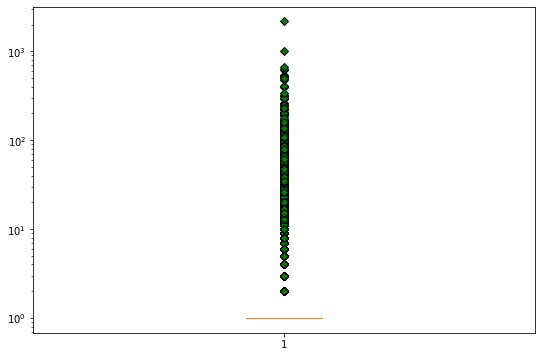

In [48]:
fig2 = plt.figure(1, figsize=(9, 6))
ax2 = fig2.add_subplot(111)
ax2.set_yscale("log")
ax2.boxplot(df.item_cnt_day, flierprops=green_diamond)

From the boxplots above, we can see some outliers that can make our model representation to overfit, therefore, for this analysis we are going to remove them:

In [57]:
df = df[df['item_price']<100000]
df = df[df['item_cnt_day']<1000]
df[['item_price','item_cnt_day']].describe()

,item_price,item_cnt_day
count,2.935846e+06,2.935846e+06
mean,8.905173e+02,1.241562e+00
std,1.717225e+03,2.209960e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,5.920000e+04,6.690000e+02


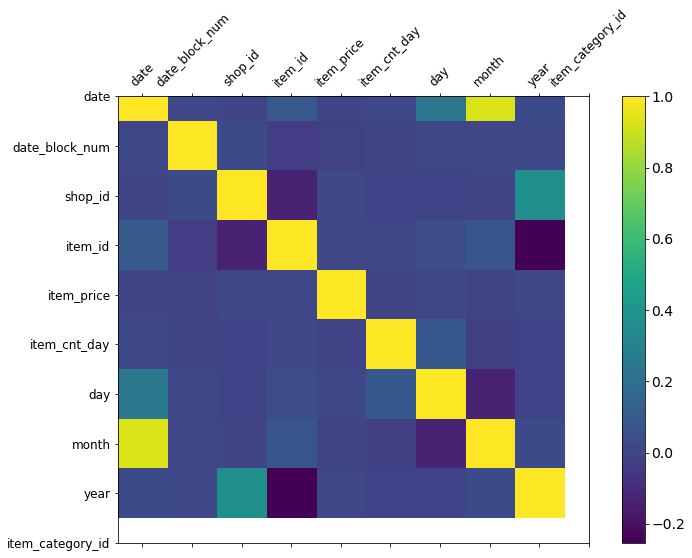

In [53]:
fig3 = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=fig3.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

From the correlation matrix we can observe that features shop_id & year are some how correlated

### Tips from instructors #1:

A good exercise is to reproduce previous_value_benchmark. As the name suggest - in this benchmark for the each shop/item pair our predictions are just monthly sales from the previous month, i.e. October 2015.

The most important step at reproducing this score is correctly aggregating daily data and constructing monthly sales data frame. You need to get lagged values, fill NaNs with zeros and clip the values into [0,20] range. If you do it correctly, you'll get precisely 1.16777 on the public leaderboard.

Generating features like this is a necessary basis for more complex models. Also, if you decide to fit some model, don't forget to clip the target into [0,20] range, it makes a big difference.

## Grouping Data for the predictions

We need to create a dataframe (grid) of all the combinations of unique (disctinct) date_block_num, store_id and item_id.

In [61]:
from itertools import product
# Create "grid" with columns
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = []
for block_num in df['date_block_num'].unique():
    cur_shops = df.loc[df['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = df.loc[df['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)
grid

(10913804, 3)


,shop_id,item_id,date_block_num
0,59,22154,0
1,59,2552,0
2,59,2554,0
3,59,2555,0
4,59,2564,0
...,...,...,...
10913799,21,7635,33
10913800,21,7638,33
10913801,21,7640,33
10913802,21,7632,33


... and now we need to merge the grid with sales to obtain the monthly sales DF, replacing NA's with 0's for the month without any sales:


In [63]:
sales_m = df.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': 'sum','item_price': np.mean}).reset_index()
sales_m = pd.merge(grid,sales_m,on=['date_block_num','shop_id','item_id'],how='left').fillna(0)

# adding the category id too from the items table.
sales_m = pd.merge(sales_m,df_items,on=['item_id'],how='left')
sales_m.head(10)

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_name,item_category_id
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37
1,59,2552,0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58
2,59,2554,0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58
3,59,2555,0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
4,59,2564,0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59
5,59,2565,0,0.0,0.0,DEEP PURPLE Stormbringer (фирм.),56
6,59,2572,0,0.0,0.0,DEFTONES Koi No Yokan,55
7,59,2573,0,0.0,0.0,DEL REY LANA Born To Die,55
8,59,2574,0,2.0,399.0,DEL REY LANA Born To Die The Paradise Editio...,55
9,59,2593,0,0.0,0.0,DEPECHE MODE Music For The Masses,55


In [64]:
sales_m.describe()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_category_id
count,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07,1.091380e+07
mean,3.118720e+01,1.130929e+04,1.497336e+01,3.339840e-01,1.164942e+02,4.491718e+01
std,1.734959e+01,6.209982e+03,9.495635e+00,3.315750e+00,6.434460e+02,1.510617e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00
25%,1.600000e+01,5.976000e+03,7.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01
50%,3.000000e+01,1.139100e+04,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+01
75%,4.600000e+01,1.660500e+04,2.300000e+01,0.000000e+00,0.000000e+00,5.500000e+01
max,5.900000e+01,2.216900e+04,3.300000e+01,1.644000e+03,5.099900e+04,8.300000e+01


### Tips from instructors #2:

You can get a rather good score after creating some lag-based features like in advice from previous week and feeding them into gradient boosted trees model.

Apart from item/shop pair lags you can try adding lagged values of total shop or total item sales (which are essentially mean-encodings). All of that is going to add some new information.

## Feature Engineering - Target Encodings

In [66]:
feats = ['item_id','shop_id','item_category_id']

agglist = [('item_price',np.mean,'avg'),('item_cnt_day',np.sum,'sum'),('item_cnt_day',np.mean,'avg')]

for ids in feats:
    for column_id,operation,aggtype in agglist:
        # get numbers from sales data and set column names
        mean_df = sales_m.groupby([ids,'date_block_num']).aggregate(operation).reset_index()[[column_id,ids,'date_block_num']]
        mean_df.columns = [ids+'_'+aggtype+'_'+column_id,ids,'date_block_num']
        # merge new columns on sales_m data
        sales_m = pd.merge(sales_m,mean_df,on=['date_block_num',ids],how='left')

In [68]:
sales_m.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_name,item_category_id,item_id_avg_item_price,item_id_sum_item_cnt_day,item_id_avg_item_cnt_day,shop_id_avg_item_price,shop_id_sum_item_cnt_day,shop_id_avg_item_cnt_day,item_category_id_avg_item_price,item_category_id_sum_item_cnt_day,item_category_id_avg_item_cnt_day
0,59,22154,0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,310.799988,18.0,0.400000,97.974472,2017.0,0.248552,63.014717,6094.0,0.199738
1,59,2552,0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58,19.977777,0.0,0.000000,97.974472,2017.0,0.248552,54.898666,287.0,0.043386
2,59,2554,0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58,37.978889,1.0,0.022222,97.974472,2017.0,0.248552,54.898666,287.0,0.043386
3,59,2555,0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,48.837776,2.0,0.044444,97.974472,2017.0,0.248552,38.267017,268.0,0.049630
4,59,2564,0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,36.400002,5.0,0.111111,97.974472,2017.0,0.248552,35.593868,701.0,0.093280


#### - Random Forest

In [ ]:
# RandomForest
from sklearn import ensemble
model = ensemble.RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=2, random_state=0)
model.fit(train_df, ytrain)
preds = model.predict_proba(valid_df)[:, 1]


#### - LSTM

In [ ]:
# LSTM
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
regressor.summary()

#Predicting
predicted_stock_price = regressor.predict(X_test)

### Metric: RMSE

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_true, y_pred, squared=False)

In [ ]:
#preds.to_csv("Submissions/submission_#.csv")

#REFERENCES
https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a
https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
    